In this lesson, we will study stability and the CFL condition

We will go deeper in analyzing the changes in the solution when one main variable component is changed: the grid size

In [1]:
import numpy as ny
from matplotlib import pyplot as py
%matplotlib inline

In [2]:
# set font family and size
py.rcParams['font.family'] = 'serif'
py.rcParams['font.size'] = 16

Now, we will create a function that solves the spacetime problems that we faced in last lesson. This will make it easier to simply identify and change the grid size

In [3]:
def lin_conv(nx, L=2.0, c=1.0, dt=0.025, nt=20):
    #create spatial grid
    dx = L / (nx-1)
    x = ny.linspace(0.0, L, num=nx)
    
    #set initial conditions
    u0 = ny.ones(nx)
    test = ny.where(ny.logical_and(x >= 0.5, x <= 1.0))
    u0[test] = 2.0
    
    #integrate the solution in time
    u = u0.copy()
    for n in range(1, nt):
        u[1:] = u[1:] - c*dt / dx * (u[1:] - u[:-1])
    
    #plot the solution with initial conditions
    py.figure(figsize=(4.0, 4.0))
    py.xlabel('x')
    py.ylabel('y')
    py.grid()
    py.plot(x, u0, label='Initial', color='C0')
    py.plot(x, u, label ='nt = {}'.format(nt), color='C1')
    py.legend()
    py.xlim(0.0, L)
    py.ylim(0.0, 2.5);

Now that we've created the funciton, we can use it to analyze the solution at different spatail grid sizes


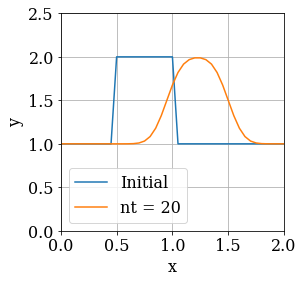

In [4]:
lin_conv(41)
#41 spacial grid points

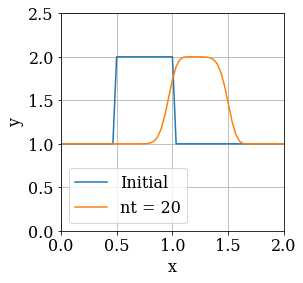

In [5]:
lin_conv(61)
#61 spatial grid points

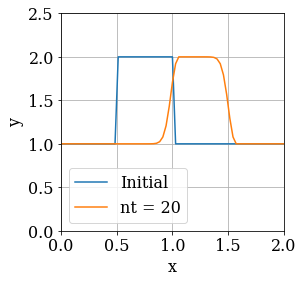

In [6]:
lin_conv(71)
# 71 spatial points

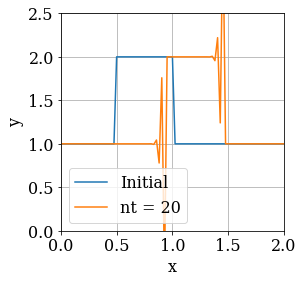

In [7]:
lin_conv(85)
# 85 spatial grid points

As you can see above, the solution was messed up. In order to find out what happened, we need to think about what is actually going on.

Over the time period delta t, the wave travels a distance which is greater than delta x, which causes the solution to become unstable. If we ask for more grid points, then dx will get smaller. They are inversely proportional.


The value of cdeltat/deltax is called the CFL number, and is denoted by sigma. If this number is less than 1 (for this case only) then the solution will "blow up" and a computation will not be created

Now we create another function the allows us to use the CFL number to change how many spacial points we input, and changes other things accordingly.

In [8]:
def lin_conv_cfl(nx, L=2.0, c=1.0, sigma = 0.5, nt = 20):
    
    #spatial grid
    dx= L/(nx - 1)
    x = ny.linspace(0.0, L, num=nx)
    
    #now, we will compute the time-step size based on the CFL constraints
    dt = sigma * dx / c
    
    #set initial conditions
    u0 = ny.ones(nx)
    test = ny.where(ny.logical_and(x >= 0.5, x <= 1.0))
    u0[test] = 2.0
    
    #integrate solution in time
    u = u0.copy()
    
    for n in range(1, nt):
        u[1:] = u[1:] - c * dt / dx * (u[1:] - u[:-1])
    
    # now we can plot
    
    py.figure(figsize=(4.0,4.0))
    py.grid()
    py.xlabel('x')
    py.ylabel('u')
    py.plot(x, u0, label = 'Initial', color = 'C0')
    py.plot(x, u, label ='nt = {}'.format(nt), color='C1')
    py.legend()
    py.xlim(0.0, L)
    py.ylim(0.0, 2.5);


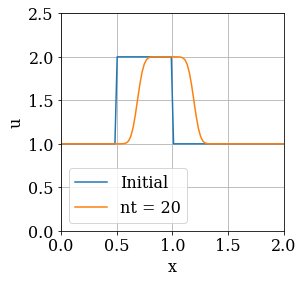

In [9]:
lin_conv_cfl(100)


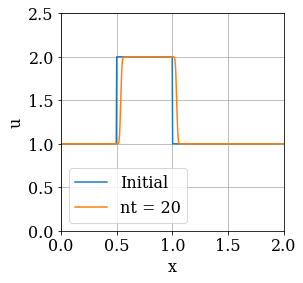

In [10]:
lin_conv_cfl(500)